### 1) 데이터 수집

In [2]:
from config import PUBLIC_DATA_API_DECODING_KEY
from config import PUBLIC_DATA_API_ENCODING_KEY

In [ ]:
import pandas as pd
import requests
import json

# 감염병별 감염병 발생 현황
disease_outbreak_url = 'http://apis.data.go.kr/1790387/EIDAPIService/Disease'

params = {'serviceKey' : PUBLIC_DATA_API_DECODING_KEY ,
          'resType' : 2,
          'searchType' : 1,
          'searchYear' : 2025,
          'patntType' : 1,
          'pageNo':1,
          'numOfRows': 1000}

# 요청 및 응답
response = requests.get(disease_outbreak_url, params=params)
response.content

b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"items":{"item":[{"year":"2025\xeb\x85\x84","patntType":"\xea\xb3\x84","icdGroupNm":"\xec\xa0\x9c1\xea\xb8\x89","icdNm":"\xec\x97\x90\xeb\xb3\xbc\xeb\x9d\xbc\xeb\xb0\x94\xec\x9d\xb4\xeb\x9f\xac\xec\x8a\xa4\xeb\xb3\x91","resultVal":"0"},{"year":"2025\xeb\x85\x84","patntType":"\xea\xb3\x84","icdGroupNm":"\xec\xa0\x9c1\xea\xb8\x89","icdNm":"\xeb\xa7\x88\xeb\xb2\x84\xea\xb7\xb8\xec\x97\xb4","resultVal":"0"},{"year":"2025\xeb\x85\x84","patntType":"\xea\xb3\x84","icdGroupNm":"\xec\xa0\x9c1\xea\xb8\x89","icdNm":"\xeb\x9d\xbc\xec\x8b\xb8\xec\x97\xb4","resultVal":"0"},{"year":"2025\xeb\x85\x84","patntType":"\xea\xb3\x84","icdGroupNm":"\xec\xa0\x9c1\xea\xb8\x89","icdNm":"\xed\x81\xac\xeb\xa6\xac\xeb\xaf\xb8\xec\x95\x88\xec\xbd\xa9\xea\xb3\xa0\xec\xb6\x9c\xed\x98\x88\xec\x97\xb4","resultVal":"0"},{"year":"2025\xeb\x85\x84","patntType":"\xea\xb3\x84","icdGroupNm":"\xec\xa0\x9c1\xea\xb8\x89","icdNm":"\xeb\x82\xa8\xec\x

In [31]:
import json
outbreak_data = response.content.decode('utf-8')
outbreak_data = json.loads(outbreak_data)
outbreak_data = outbreak_data['response']['body']['items']['item']

In [32]:
outbreak_df= pd.DataFrame(outbreak_data)
outbreak_df

,year,patntType,icdGroupNm,icdNm,resultVal
0,2025년,계,제1급,에볼라바이러스병,0
1,2025년,계,제1급,마버그열,0
2,2025년,계,제1급,라싸열,0
3,2025년,계,제1급,크리미안콩고출혈열,0
4,2025년,계,제1급,남아메리카출혈열,0
...,...,...,...,...,...
61,2025년,계,제3급,중증열성혈소판감소증후군(SFTS),274
62,2025년,계,제3급,지카바이러스감염증,3
63,2025년,계,제3급,매독,"2,192"
64,2025년,계,제3급,매독(선천성),14


In [ ]:
# 기간별 감염병 발생 현황
disease_period_url = 'http://apis.data.go.kr/1790387/EIDAPIService/PeriodBasic'
pagenum = 1
items = [] 

params = {'serviceKey' : PUBLIC_DATA_API_DECODING_KEY ,
          'resType' : 2,
          'searchPeriodType' : 2,
          'searchStartYear' : 2020,
          'searchEndYear' : 2024,
          'pageNo': pagenum,
          'numOfRows': 1000}

# 요청 및 응답
while True:
    params['pageNo'] = pagenum
    response = requests.get(disease_period_url, params=params)
    period_data = response.content.decode('utf-8')
    data = json.loads(period_data)
    period_data = data['response']['body']['items']['item']
    items.extend(period_data)
    
    total = data['response']['body']['totalCount']
    if len(items) >= total:
        break
    page += 1

period_df = pd.DataFrame(items)
period_df

,period,icdGroupNm,icdNm,resultVal
0,2020년 01월,제1급,에볼라바이러스병,0
1,2020년 02월,제1급,에볼라바이러스병,0
2,2020년 03월,제1급,에볼라바이러스병,0
3,2020년 04월,제1급,에볼라바이러스병,0
4,2020년 05월,제1급,에볼라바이러스병,0
...,...,...,...,...
866,2020년 09월,제3급,매독(선천성),-1
867,2020년 10월,제3급,매독(선천성),-1
868,2020년 11월,제3급,매독(선천성),-1
869,2020년 12월,제3급,매독(선천성),-1


In [61]:
all_items = []

for year in range(2020, 2025):
    page = 1
    while True:
        params['searchStartYear'] = year
        params['searchEndYear'] = year
        params['pageNo'] = page
        
        response = requests.get(disease_period_url, params=params)
        data = json.loads(response.content.decode('utf-8'))
        items = data['response']['body']['items']['item']
        all_items.extend(items)
        
        total = int(data['response']['body']['totalCount'])
        if len(all_items) >= total:
            break
        page += 1

period_df = pd.DataFrame(all_items)
period_df

,period,icdGroupNm,icdNm,resultVal
0,2020년 01월,제1급,에볼라바이러스병,0
1,2020년 02월,제1급,에볼라바이러스병,0
2,2020년 03월,제1급,에볼라바이러스병,0
3,2020년 04월,제1급,에볼라바이러스병,0
4,2020년 05월,제1급,에볼라바이러스병,0
...,...,...,...,...
4350,2024년 09월,제3급,매독(선천성),3
4351,2024년 10월,제3급,매독(선천성),1
4352,2024년 11월,제3급,매독(선천성),0
4353,2024년 12월,제3급,매독(선천성),1


### 2) 데이터 확인 및 전처리

In [33]:
# 감염병 별 발생 통계 데이터 확인
outbreak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        66 non-null     object
 1   patntType   66 non-null     object
 2   icdGroupNm  66 non-null     object
 3   icdNm       66 non-null     object
 4   resultVal   66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [35]:
outbreak_df.describe()

,year,patntType,icdGroupNm,icdNm,resultVal
count,66,66,66,66,66
unique,1,1,3,66,41
top,2025년,계,제3급,에볼라바이러스병,0
freq,66,66,28,1,25


In [64]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   period      4355 non-null   object
 1   icdGroupNm  4355 non-null   object
 2   icdNm       4355 non-null   object
 3   resultVal   4355 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 136.2+ KB


In [65]:
period_df.describe()

,resultVal
count,4355.000000
mean,224.969460
std,1727.397634
min,-12.000000
25%,0.000000
50%,0.000000
75%,8.000000
max,48048.000000


In [63]:
period_df['resultVal'] = period_df['resultVal'].astype('int')

In [80]:
period_df.drop(period_df[period_df['period']=='계'].index, inplace=True)

In [81]:
period_df['period'].unique()

array(['2020년 01월', '2020년 02월', '2020년 03월', '2020년 04월', '2020년 05월',
       '2020년 06월', '2020년 07월', '2020년 08월', '2020년 09월', '2020년 10월',
       '2020년 11월', '2020년 12월', '2021년 01월', '2021년 02월', '2021년 03월',
       '2021년 04월', '2021년 05월', '2021년 06월', '2021년 07월', '2021년 08월',
       '2021년 09월', '2021년 10월', '2021년 11월', '2021년 12월', '2022년 01월',
       '2022년 02월', '2022년 03월', '2022년 04월', '2022년 05월', '2022년 06월',
       '2022년 07월', '2022년 08월', '2022년 09월', '2022년 10월', '2022년 11월',
       '2022년 12월', '2023년 01월', '2023년 02월', '2023년 03월', '2023년 04월',
       '2023년 05월', '2023년 06월', '2023년 07월', '2023년 08월', '2023년 09월',
       '2023년 10월', '2023년 11월', '2023년 12월', '2024년 01월', '2024년 02월',
       '2024년 03월', '2024년 04월', '2024년 05월', '2024년 06월', '2024년 07월',
       '2024년 08월', '2024년 09월', '2024년 10월', '2024년 11월', '2024년 12월'],
      dtype=object)

In [93]:
period_df.head(20)

,period,icdGroupNm,icdNm,resultVal
0,2020년 01월,제1급,에볼라바이러스병,0
1,2020년 02월,제1급,에볼라바이러스병,0
2,2020년 03월,제1급,에볼라바이러스병,0
3,2020년 04월,제1급,에볼라바이러스병,0
4,2020년 05월,제1급,에볼라바이러스병,0
5,2020년 06월,제1급,에볼라바이러스병,0
6,2020년 07월,제1급,에볼라바이러스병,0
7,2020년 08월,제1급,에볼라바이러스병,0
8,2020년 09월,제1급,에볼라바이러스병,0
9,2020년 10월,제1급,에볼라바이러스병,0


감염병 발생 건수가 많은 상위 20개

C:\Users\USER\AppData\Local\Temp\ipykernel_24096\3170137702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20.values, y=top20.index, palette='YlGn')


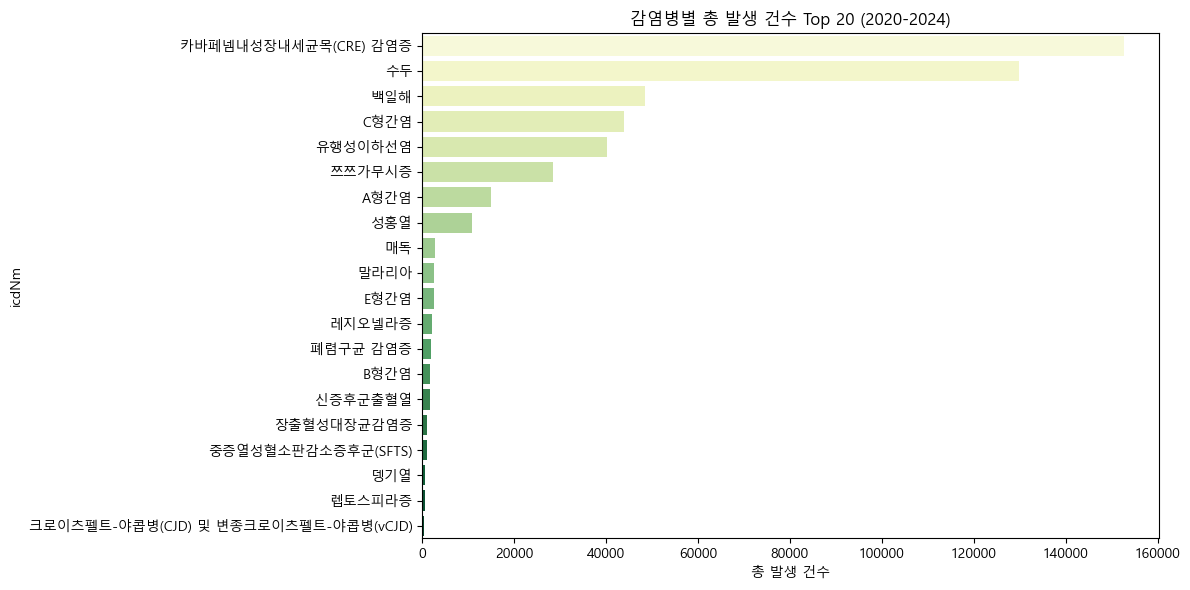

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

top20 = period_df.groupby('icdNm')['resultVal'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top20.values, y=top20.index, palette='YlGn')
plt.xlabel('총 발생 건수')
plt.title('감염병별 총 발생 건수 Top 20 (2020-2024)')
plt.tight_layout()
plt.show()

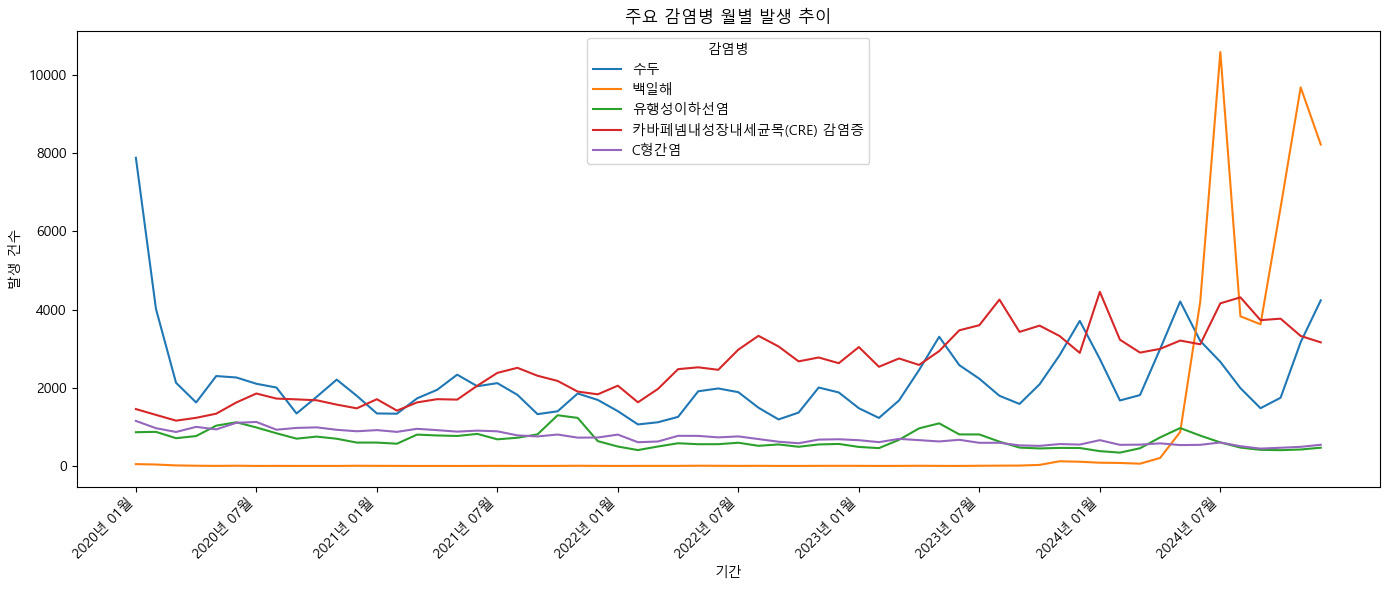

In [92]:
top5 = top20.index[:5].tolist()
df_top5 = period_df[period_df['icdNm'].isin(top5)].copy()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top5, x='period', y='resultVal', hue='icdNm')
plt.xticks(rotation=45, ha='right')
# period 값이 많으면 간격 조절
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::6])  # 6개월 간격
plt.xlabel('기간')
plt.ylabel('발생 건수')
plt.title('주요 감염병 월별 발생 추이')
plt.legend(title='감염병')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24096\1565690746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\1565690746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\1565690746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm'

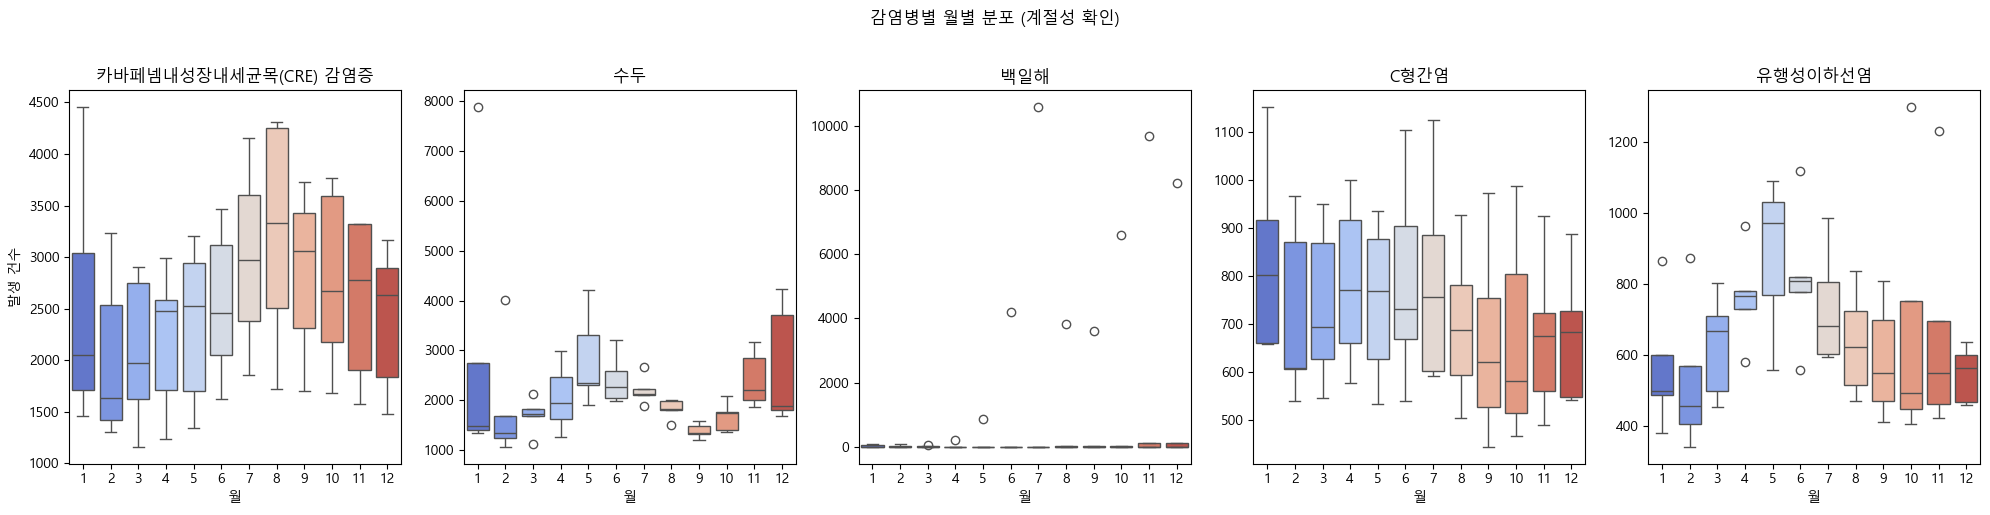

In [86]:
# period에서 월 추출 (period 형식에 따라 수정 필요)
df_top5['month'] = df_top5['period'].str.extract(r'(\d{2})월')[0].astype(int)
df_top5['year'] = df_top5['period'].str.extract(r'(\d{4})년')[0].astype(int)

fig, axes = plt.subplots(1, len(top5), figsize=(20, 5), sharey=False)
for i, disease in enumerate(top5):
    subset = df_top5[df_top5['icdNm'] == disease]
    sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
    axes[i].set_title(disease)
    axes[i].set_xlabel('월')
    axes[i].set_ylabel('발생 건수' if i == 0 else '')
plt.suptitle('감염병별 월별 분포 (계절성 확인)', y=1.02)
plt.tight_layout()
plt.show()

### 3) 모델 구축 및 학습

피처 엔지니어링 완료: (240, 16)
대상 감염병: ['카바페넴내성장내세균목(CRE) 감염증', '수두', '백일해', 'C형간염', '유행성이하선염']

=== 카바페넴내성장내세균목(CRE) 감염증 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=322.9, RMSE=419.9, R²=-0.046

=== 수두 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=487.3, RMSE=502.3, R²=0.717

=== 백일해 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=4144.4, RMSE=4909.6, R²=-2.354

=== C형간염 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=53.4, RMSE=60.5, R²=-0.370

=== 유행성이하선염 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=74.3, RMSE=99.9, R²=-1.200

📌 2026년 2월 감염병 발생 예측

카바페넴내성장내세균목(CRE) 감염증:
  LinearRegression: 3,767건
  RandomForest: 3,730건

수두:
  LinearRegression: 1,745건
  RandomForest: 3,149건

백일해:
  LinearRegression: 6,611건
  RandomForest: 7,888건

C형간염:
  LinearRegression: 465건
  RandomForest: 534건

유행성이하선염:
  LinearRegression: 404건
  RandomForest: 416건


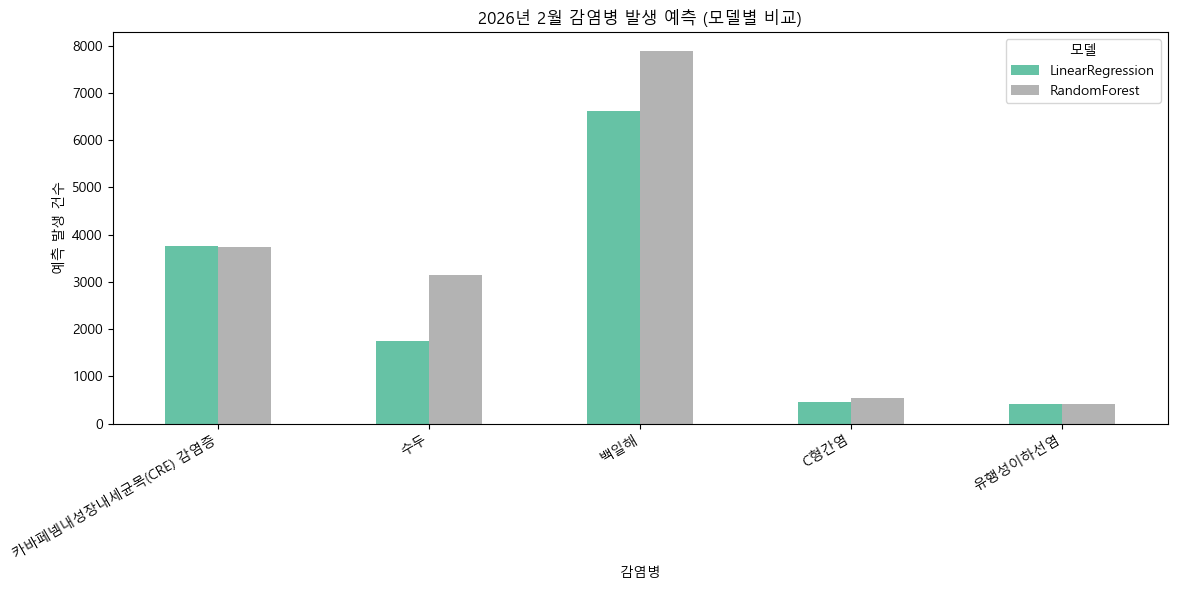

C:\Users\USER\AppData\Local\Temp\ipykernel_24096\131495957.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\131495957.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\131495957.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\Tem

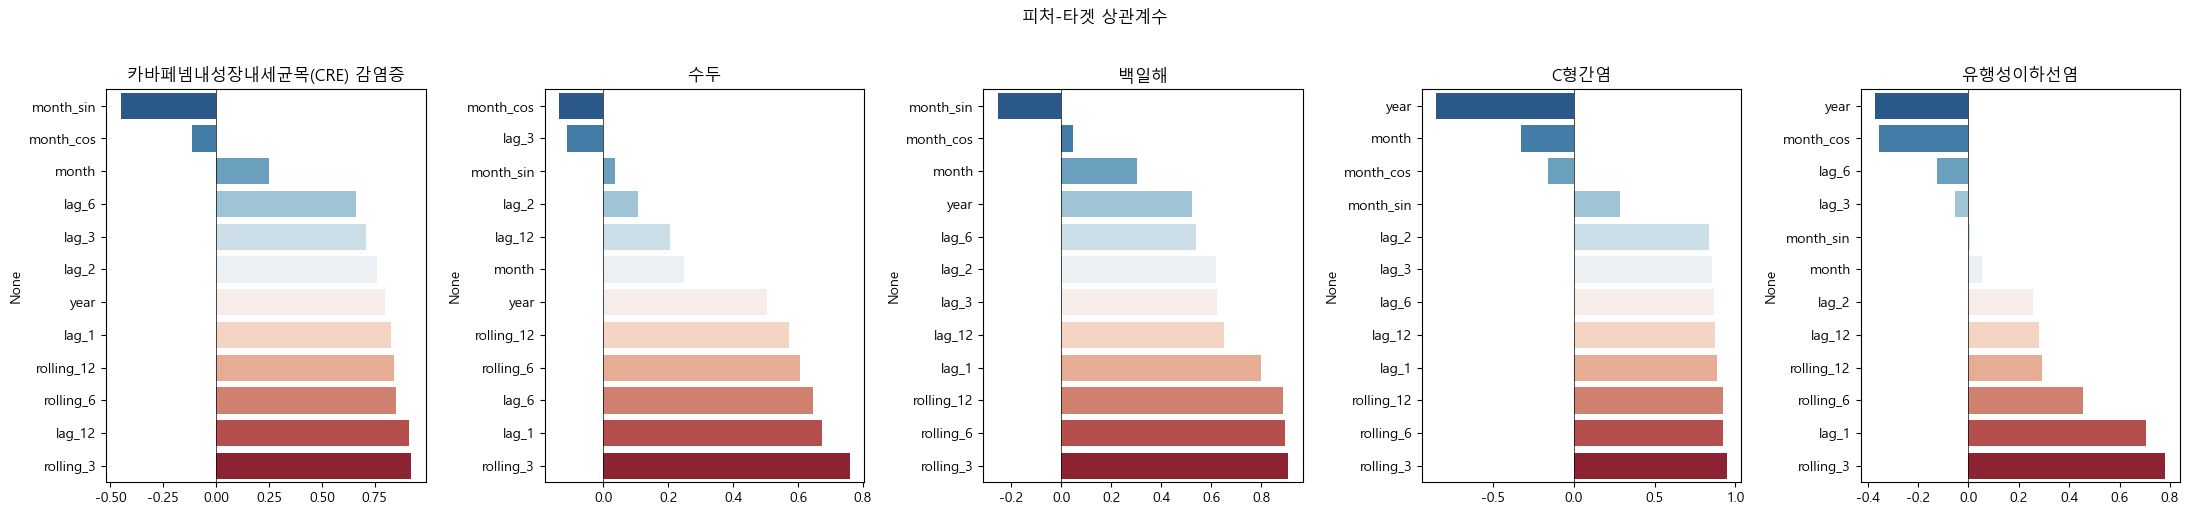

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==============================
# 1. 피처 엔지니어링
# ==============================
top5 = period_df.groupby('icdNm')['resultVal'].sum().sort_values(ascending=False).head(5).index.tolist()
df = period_df[period_df['icdNm'].isin(top5)].copy()

# 연도, 월 추출
df['year'] = df['period'].str.extract(r'(\d{4})년')[0].astype(int)
df['month'] = df['period'].str.extract(r'(\d{2})월')[0].astype(int)

# 시간 순 정렬
df = df.sort_values(['icdNm', 'year', 'month']).reset_index(drop=True)

# 계절 피처 (사이클 특성 반영)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# lag 피처 (감염병별로 과거 발생 건수)
for lag in [1, 2, 3, 6, 12]:
    df[f'lag_{lag}'] = df.groupby('icdNm')['resultVal'].shift(lag)

# 이동평균
df['rolling_3'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(3).mean())
df['rolling_6'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(6).mean())
df['rolling_12'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(12).mean())

# 결측치 제거 (lag 때문에 앞부분 NaN)
df = df.dropna().reset_index(drop=True)

print(f"피처 엔지니어링 완료: {df.shape}")
print(f"대상 감염병: {top5}")

# ==============================
# 2. 모델 학습 및 평가
# ==============================
features = ['year', 'month', 'month_sin', 'month_cos',
            'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12',
            'rolling_3', 'rolling_6', 'rolling_12']

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}  # 평가 결과 저장
predictions_2026 = {}  # 2026-02 예측 저장

for disease in top5:
    df_disease = df[df['icdNm'] == disease].copy()
    
    # 시계열 분리: 마지막 6개월을 test로
    train = df_disease.iloc[:-6]
    test = df_disease.iloc[-6:]
    
    X_train, y_train = train[features], train['resultVal']
    X_test, y_test = test[features], test['resultVal']
    
    results[disease] = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[disease][name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    print(f"\n=== {disease} ===")
    for name, metrics in results[disease].items():
        print(f"  {name}: MAE={metrics['MAE']:.1f}, RMSE={metrics['RMSE']:.1f}, R²={metrics['R2']:.3f}")

# ==============================
# 3. 2026년 2월 예측
# ==============================
print("\n" + "=" * 50)
print("📌 2026년 2월 감염병 발생 예측")
print("=" * 50)

for disease in top5:
    df_disease = df[df['icdNm'] == disease].copy()
    recent = df_disease.sort_values(['year', 'month']).tail(12)
    
    # 2026-02 피처 생성
    future = pd.DataFrame({
        'year': [2026],
        'month': [2],
        'month_sin': [np.sin(2 * np.pi * 2 / 12)],
        'month_cos': [np.cos(2 * np.pi * 2 / 12)],
        'lag_1': [recent.iloc[-1]['resultVal']],    # 1개월 전
        'lag_2': [recent.iloc[-2]['resultVal']],    # 2개월 전
        'lag_3': [recent.iloc[-3]['resultVal']],    # 3개월 전
        'lag_6': [recent.iloc[-6]['resultVal']],    # 6개월 전
        'lag_12': [recent.iloc[-12]['resultVal']],  # 12개월 전
        'rolling_3': [recent.tail(3)['resultVal'].mean()],
        'rolling_6': [recent.tail(6)['resultVal'].mean()],
        'rolling_12': [recent.tail(12)['resultVal'].mean()],
    })
    
    # 전체 데이터로 재학습 후 예측
    X_all = df_disease[features]
    y_all = df_disease['resultVal']
    
    predictions_2026[disease] = {}
    for name, model in models.items():
        model.fit(X_all, y_all)
        pred = model.predict(future)[0]
        predictions_2026[disease][name] = max(0, int(pred))  # 음수 방지
    
    print(f"\n{disease}:")
    for name, pred in predictions_2026[disease].items():
        print(f"  {name}: {pred:,}건")

# ==============================
# 4. 예측 결과 시각화
# ==============================
pred_df = pd.DataFrame(predictions_2026).T
pred_df.columns = list(models.keys())

fig, ax = plt.subplots(figsize=(12, 6))
pred_df.plot(kind='bar', ax=ax, colormap='Set2')
plt.title('2026년 2월 감염병 발생 예측 (모델별 비교)')
plt.xlabel('감염병')
plt.ylabel('예측 발생 건수')
plt.xticks(rotation=30, ha='right')
plt.legend(title='모델')
plt.tight_layout()
plt.show()

# 기존 (5번 XGBoost 피처 중요도 전체 삭제 후 아래로 교체)

fig, axes = plt.subplots(1, len(top5), figsize=(22, 5))
for i, disease in enumerate(top5):
    df_disease = df[df['icdNm'] == disease]
    corr = df_disease[features + ['resultVal']].corr()['resultVal'].drop('resultVal').sort_values()
    sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
    axes[i].set_title(disease)
    axes[i].axvline(0, color='black', linewidth=0.5)
plt.suptitle('피처-타겟 상관계수', y=1.02)
plt.tight_layout()
plt.show()

피처 엔지니어링 완료: (240, 16)
대상 감염병: ['카바페넴내성장내세균목(CRE) 감염증', '수두', '백일해', 'C형간염', '유행성이하선염']


C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20.values, y=top20.index, palette='viridis')


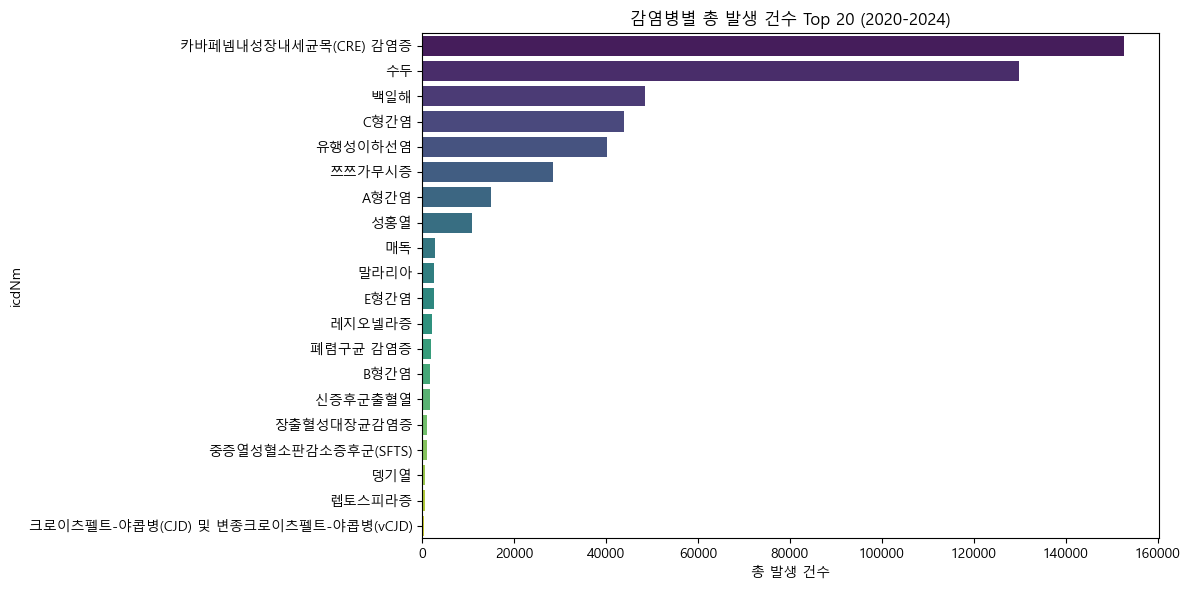

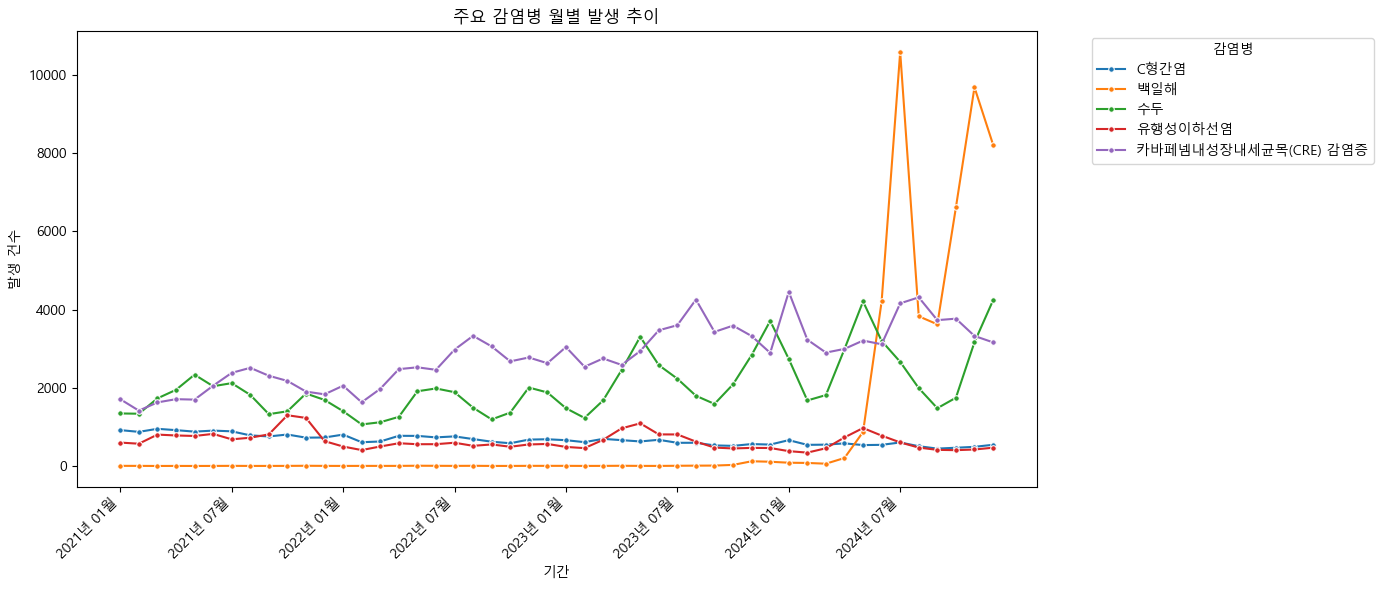

C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwa

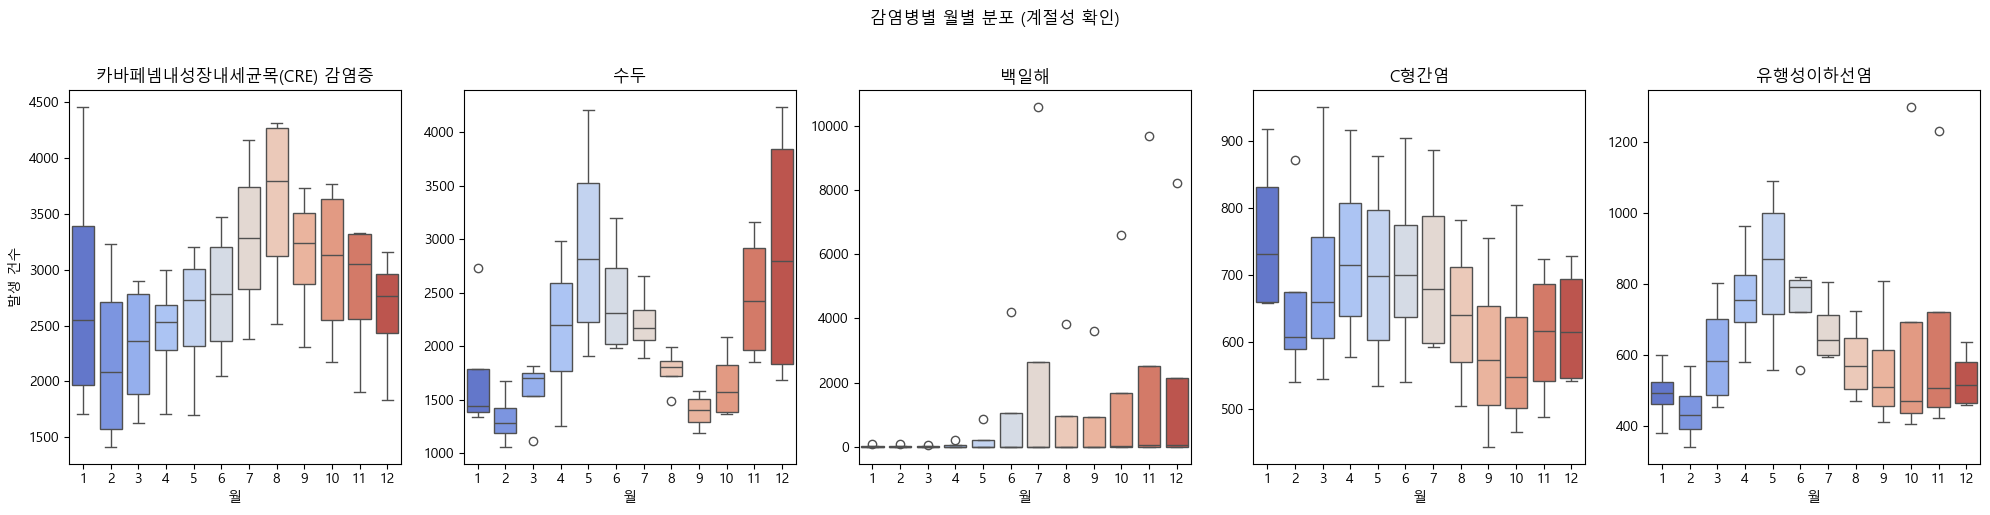


=== 카바페넴내성장내세균목(CRE) 감염증 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=322.9, RMSE=419.9, R²=-0.046

=== 수두 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=487.3, RMSE=502.3, R²=0.717

=== 백일해 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=4144.4, RMSE=4909.6, R²=-2.354

=== C형간염 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=53.4, RMSE=60.5, R²=-0.370

=== 유행성이하선염 ===
  LinearRegression: MAE=0.0, RMSE=0.0, R²=1.000
  RandomForest: MAE=74.3, RMSE=99.9, R²=-1.200


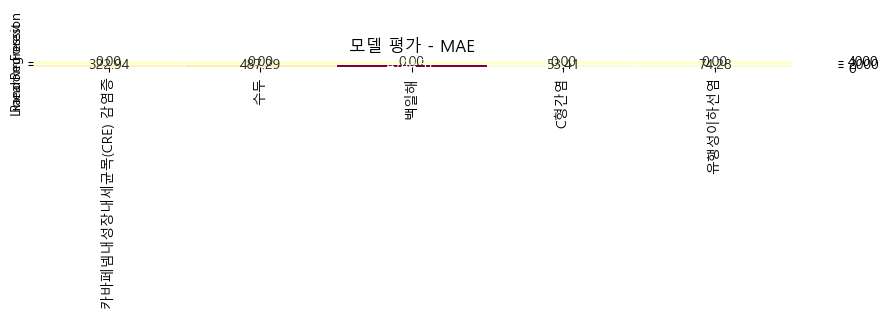

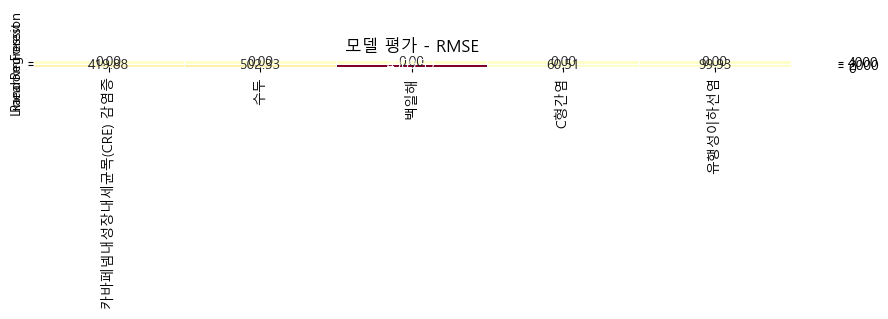

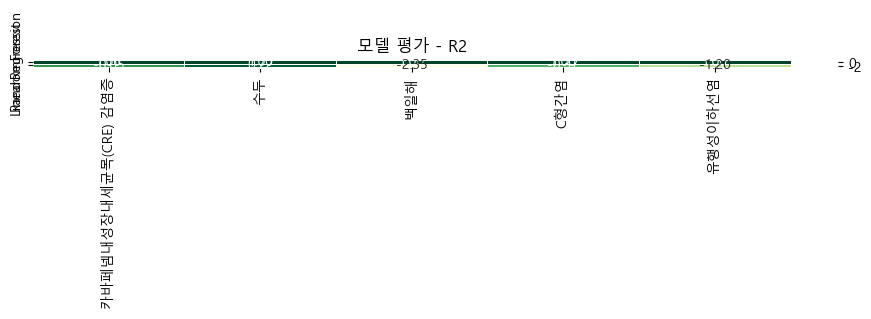


📌 2026년 2월 감염병 발생 예측

카바페넴내성장내세균목(CRE) 감염증:
  LinearRegression: 3,767건
  RandomForest: 3,730건

수두:
  LinearRegression: 1,745건
  RandomForest: 3,149건

백일해:
  LinearRegression: 6,611건
  RandomForest: 7,888건

C형간염:
  LinearRegression: 465건
  RandomForest: 534건

유행성이하선염:
  LinearRegression: 404건
  RandomForest: 416건


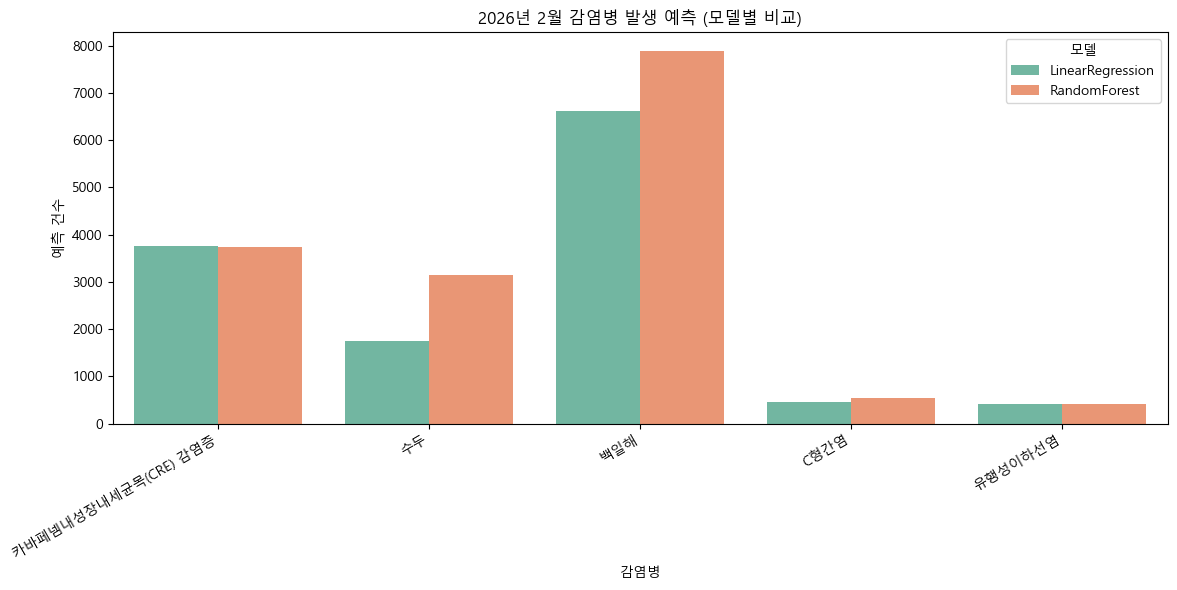

C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\Temp\ipykernel_24096\2518285438.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
C:\Users\USER\AppData\Local\

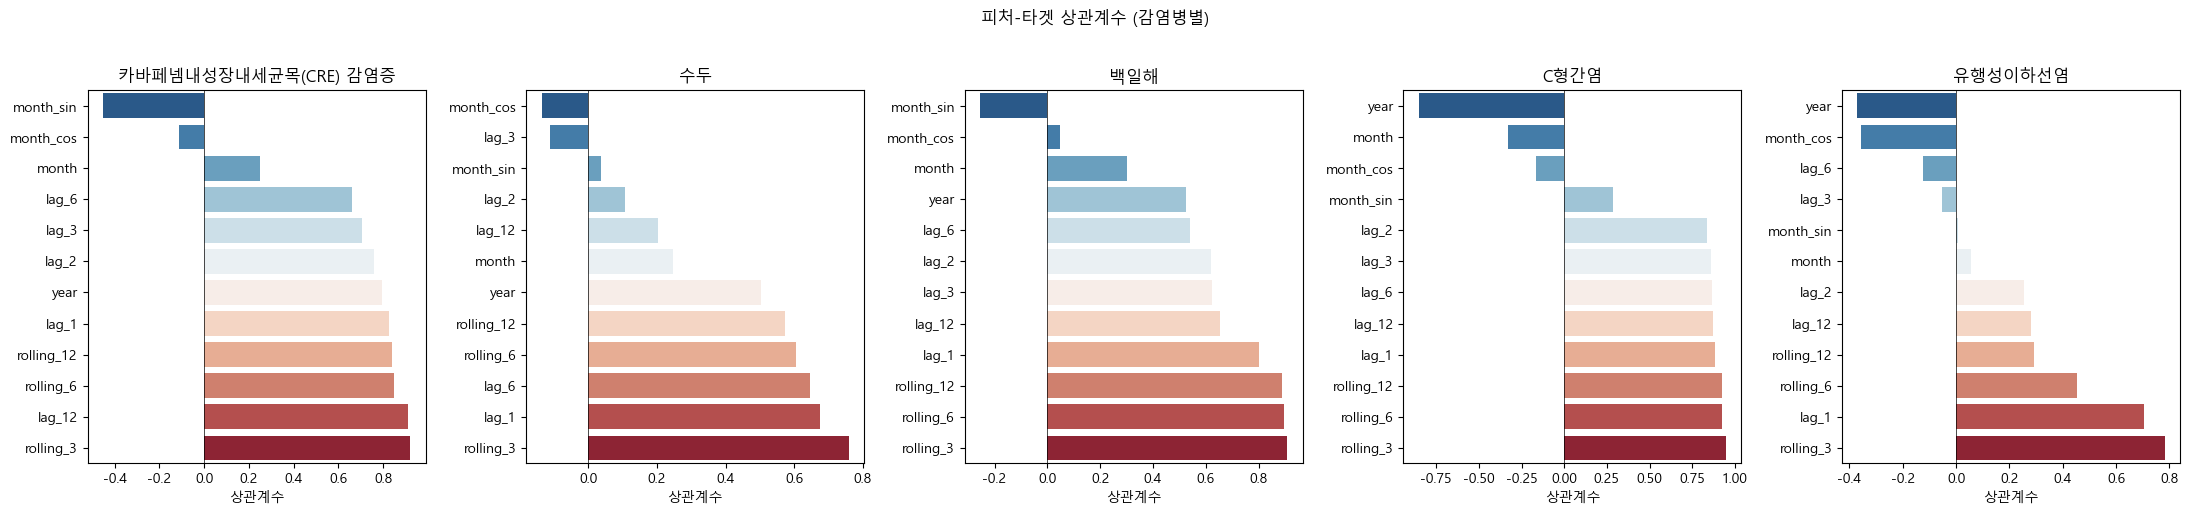

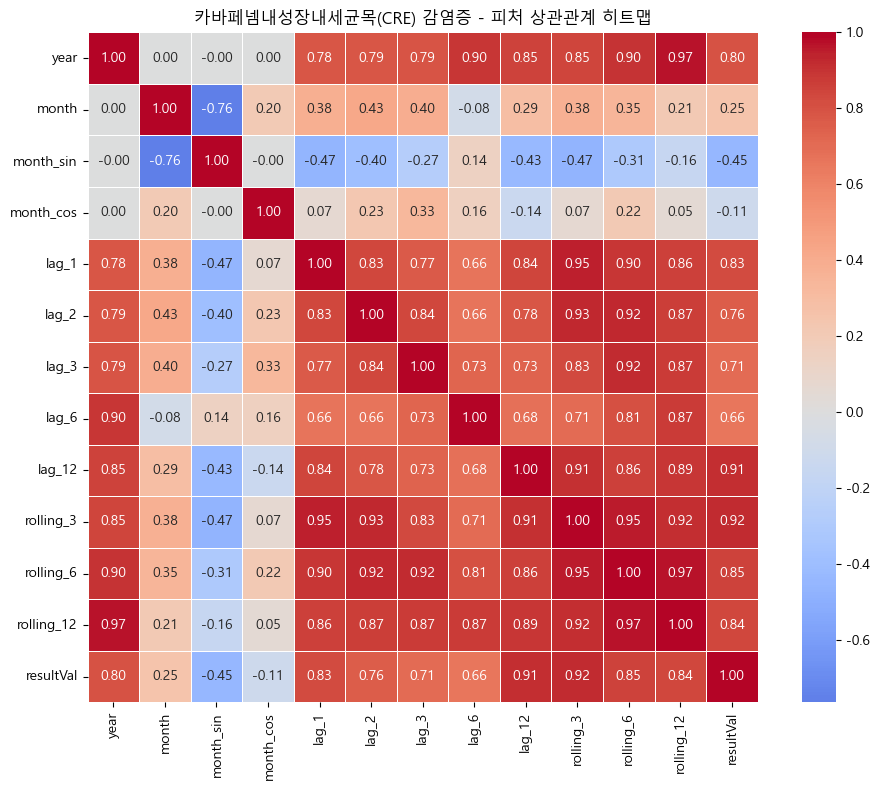

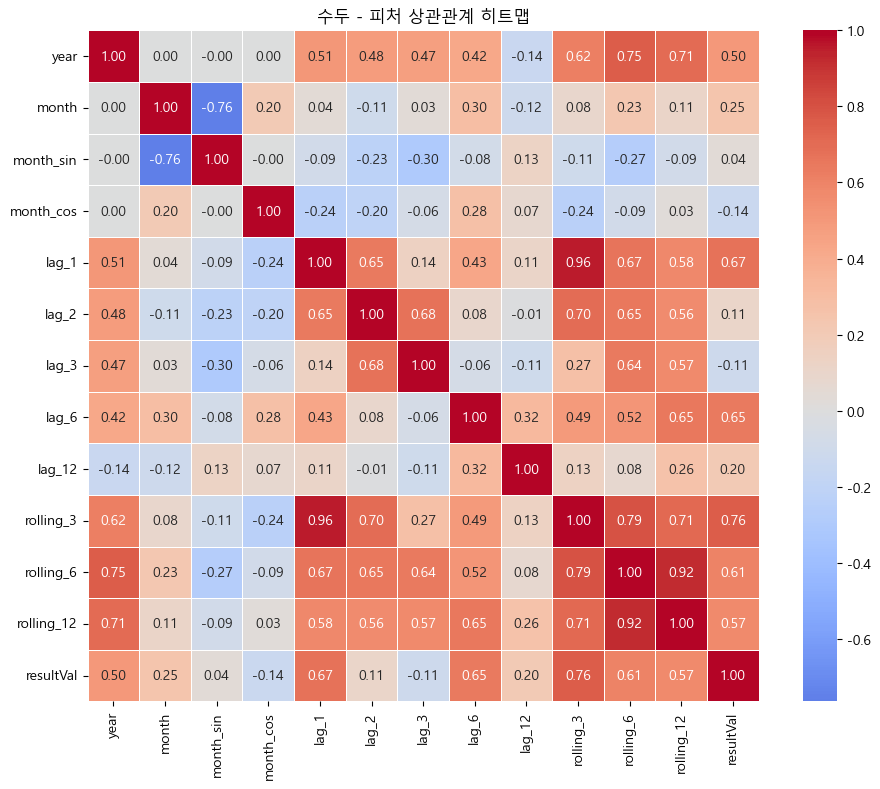

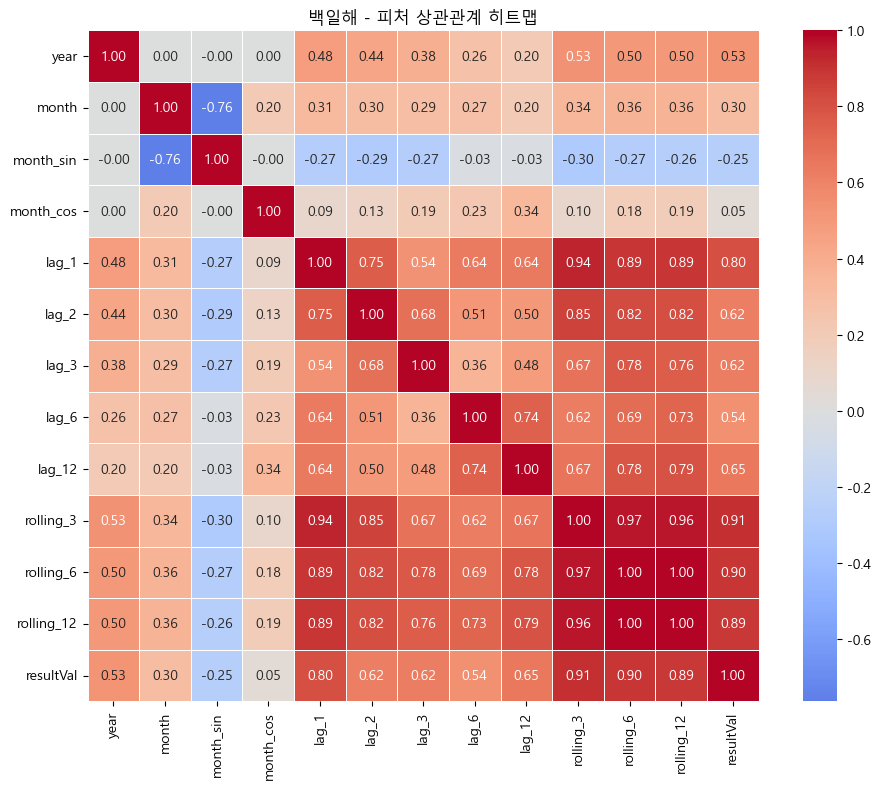

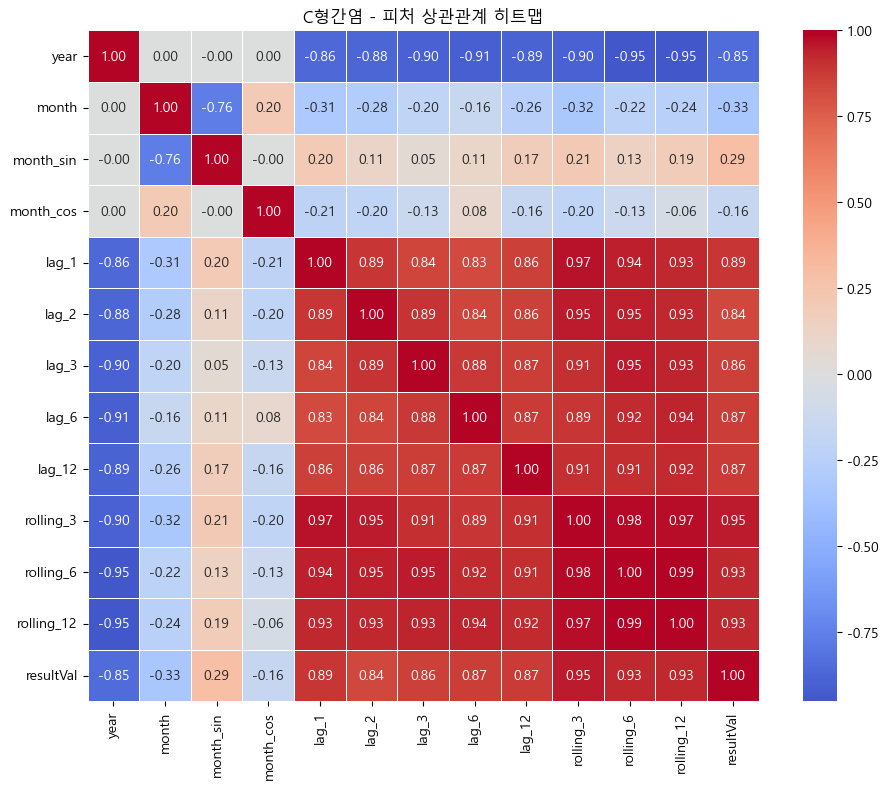

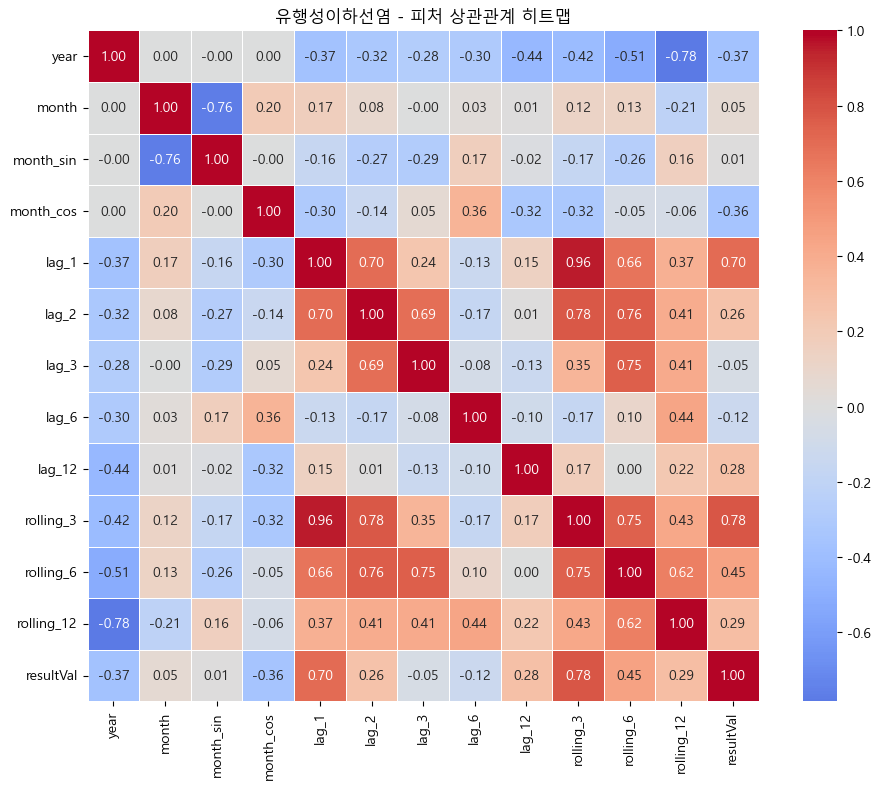

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 한글 폰트 설정 (Windows: Malgun Gothic / Mac: AppleGothic)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# ==============================
# 1. 피처 엔지니어링
# ==============================
top5 = period_df.groupby('icdNm')['resultVal'].sum().sort_values(ascending=False).head(5).index.tolist()
df = period_df[period_df['icdNm'].isin(top5)].copy()

# 연도, 월 추출
df['year'] = df['period'].str.extract(r'(\d{4})년')[0].astype(int)
df['month'] = df['period'].str.extract(r'(\d{2})월')[0].astype(int)

# 시간 순 정렬
df = df.sort_values(['icdNm', 'year', 'month']).reset_index(drop=True)

# 계절 피처 (순환 인코딩)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# lag 피처
for lag in [1, 2, 3, 6, 12]:
    df[f'lag_{lag}'] = df.groupby('icdNm')['resultVal'].shift(lag)

# 이동평균
df['rolling_3'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(3).mean())
df['rolling_6'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(6).mean())
df['rolling_12'] = df.groupby('icdNm')['resultVal'].transform(lambda x: x.rolling(12).mean())

# 결측치 제거
df = df.dropna().reset_index(drop=True)

features = ['year', 'month', 'month_sin', 'month_cos',
            'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12',
            'rolling_3', 'rolling_6', 'rolling_12']

print(f"피처 엔지니어링 완료: {df.shape}")
print(f"대상 감염병: {top5}")

# ==============================
# 2. EDA - 감염병별 총 발생 건수 Top 20
# ==============================
top20 = period_df.groupby('icdNm')['resultVal'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top20.values, y=top20.index, palette='viridis')
plt.xlabel('총 발생 건수')
plt.title('감염병별 총 발생 건수 Top 20 (2020-2024)')
plt.tight_layout()
plt.show()

# ==============================
# 3. EDA - Top 5 감염병 월별 시계열 추이
# ==============================
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='period', y='resultVal', hue='icdNm', marker='o', markersize=4)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::6])
plt.xlabel('기간')
plt.ylabel('발생 건수')
plt.title('주요 감염병 월별 발생 추이')
plt.legend(title='감염병', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ==============================
# 4. EDA - 월별 계절성 확인 (boxplot)
# ==============================
fig, axes = plt.subplots(1, len(top5), figsize=(20, 5), sharey=False)
for i, disease in enumerate(top5):
    subset = df[df['icdNm'] == disease]
    sns.boxplot(data=subset, x='month', y='resultVal', ax=axes[i], palette='coolwarm')
    axes[i].set_title(disease)
    axes[i].set_xlabel('월')
    axes[i].set_ylabel('발생 건수' if i == 0 else '')
plt.suptitle('감염병별 월별 분포 (계절성 확인)', y=1.02)
plt.tight_layout()
plt.show()

# ==============================
# 5. 모델 학습 및 평가
# ==============================
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
}

results = {}
predictions_2026 = {}

for disease in top5:
    df_disease = df[df['icdNm'] == disease].copy()

    # 시계열 분리: 마지막 6개월을 test로
    train = df_disease.iloc[:-6]
    test = df_disease.iloc[-6:]

    X_train, y_train = train[features], train['resultVal']
    X_test, y_test = test[features], test['resultVal']

    results[disease] = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results[disease][name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"\n=== {disease} ===")
    for name, metrics in results[disease].items():
        print(f"  {name}: MAE={metrics['MAE']:.1f}, RMSE={metrics['RMSE']:.1f}, R²={metrics['R2']:.3f}")

# 평가 결과 히트맵
for metric_name in ['MAE', 'RMSE', 'R2']:
    metric_df = pd.DataFrame({
        disease: {model: results[disease][model][metric_name] for model in models}
        for disease in top5
    })
    plt.figure(figsize=(10, 3))
    sns.heatmap(metric_df, annot=True, fmt='.2f', cmap='YlOrRd' if metric_name != 'R2' else 'YlGn', linewidths=0.5)
    plt.title(f'모델 평가 - {metric_name}')
    plt.tight_layout()
    plt.show()

# ==============================
# 6. 2026년 2월 예측
# ==============================
print("\n" + "=" * 50)
print("📌 2026년 2월 감염병 발생 예측")
print("=" * 50)

for disease in top5:
    df_disease = df[df['icdNm'] == disease].copy()
    recent = df_disease.sort_values(['year', 'month']).tail(12)

    future = pd.DataFrame({
        'year': [2026],
        'month': [2],
        'month_sin': [np.sin(2 * np.pi * 2 / 12)],
        'month_cos': [np.cos(2 * np.pi * 2 / 12)],
        'lag_1': [recent.iloc[-1]['resultVal']],
        'lag_2': [recent.iloc[-2]['resultVal']],
        'lag_3': [recent.iloc[-3]['resultVal']],
        'lag_6': [recent.iloc[-6]['resultVal']],
        'lag_12': [recent.iloc[-12]['resultVal']],
        'rolling_3': [recent.tail(3)['resultVal'].mean()],
        'rolling_6': [recent.tail(6)['resultVal'].mean()],
        'rolling_12': [recent.tail(12)['resultVal'].mean()],
    })

    X_all = df_disease[features]
    y_all = df_disease['resultVal']

    predictions_2026[disease] = {}
    for name, model in models.items():
        model.fit(X_all, y_all)
        pred = model.predict(future)[0]
        predictions_2026[disease][name] = max(0, int(pred))

    print(f"\n{disease}:")
    for name, pred in predictions_2026[disease].items():
        print(f"  {name}: {pred:,}건")

# 예측 결과 시각화
pred_df = pd.DataFrame(predictions_2026).T
pred_df.columns = list(models.keys())
pred_melted = pred_df.reset_index().melt(id_vars='index', var_name='모델', value_name='예측 건수')
pred_melted.rename(columns={'index': '감염병'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=pred_melted, x='감염병', y='예측 건수', hue='모델', palette='Set2')
plt.title('2026년 2월 감염병 발생 예측 (모델별 비교)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# ==============================
# 7. 피처-타겟 상관계수 히트맵
# ==============================
fig, axes = plt.subplots(1, len(top5), figsize=(22, 5))
for i, disease in enumerate(top5):
    df_disease = df[df['icdNm'] == disease]
    corr = df_disease[features + ['resultVal']].corr()['resultVal'].drop('resultVal').sort_values()
    sns.barplot(x=corr.values, y=corr.index, ax=axes[i], palette='RdBu_r')
    axes[i].set_title(disease)
    axes[i].axvline(0, color='black', linewidth=0.5)
    axes[i].set_xlabel('상관계수')
    axes[i].set_ylabel('')
plt.suptitle('피처-타겟 상관계수 (감염병별)', y=1.02)
plt.tight_layout()
plt.show()

# 전체 상관관계 히트맵
for disease in top5:
    df_disease = df[df['icdNm'] == disease]
    corr_matrix = df_disease[features + ['resultVal']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=0.5)
    plt.title(f'{disease} - 피처 상관관계 히트맵')
    plt.tight_layout()
    plt.show()

### 4) 모델 평가 및 시각화